In [24]:

import math
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [25]:
from glob import glob
train_image_path='/Users/anik_singhal/Desktop/Projects/makathon/dataset/chest_xray/train'
train_image=glob(train_image_path+'/*/*.jp*g')
len(train_image)

5216

In [26]:
test_image_path='/Users/anik_singhal/Desktop/Projects/makathon/dataset/chest_xray/test'
test_image=glob(test_image_path+'/*/*.jp*g')
len(test_image)

624

In [27]:
import tensorflow as tf
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_data_generator=ImageDataGenerator(rescale=1./255,
                                       shear_range=0.2,
                                       zoom_range=0.2,
                                       horizontal_flip=True)


In [28]:
test_data_generator=ImageDataGenerator(rescale=1./255,shear_range=0.2,
                                       zoom_range=0.2,
                                       horizontal_flip=True)

In [29]:
train_data=train_data_generator.flow_from_directory(train_image_path,
                                                   target_size=(64,64),
                                                   batch_size=32,
                                                   class_mode='binary')
test_data=test_data_generator.flow_from_directory(test_image_path,
                                                 target_size=(64,64),
                                                 batch_size=32,
                                                 class_mode='binary')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# training CNN model

In [30]:
from tensorflow.keras.layers import  Input, Conv2D, Dense, Flatten, Dropout, MaxPool2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model

input_layer=Input(shape=(64,64,3))
conv1=Conv2D(16, (3,3), strides=1, activation='relu')(input_layer)
maxpool1=MaxPool2D(2,2)(conv1)
conv2=Conv2D(32, (3,3), strides=1, activation='relu')(maxpool1)
maxpool2=MaxPool2D(2,2)(conv2)
conv3=Conv2D(16, (3,3), strides=1, activation='relu')(maxpool2)
maxpool3=MaxPool2D(2,2)(conv3)
flat=Flatten()(maxpool3)
dense1=Dense(16, activation='relu')(flat)
output_layer=Dense(1, activation='sigmoid')(dense1)

model=Model(input_layer, output_layer)

In [31]:
from tensorflow.keras.optimizers import Adam
adam=Adam(learning_rate=0.0001)
model.compile(optimizer=adam,
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [32]:

# from tensorflow.keras.utils import plot_model
# plot_model(model, show_shapes=True, show_layer_names=True)

In [33]:

step_per_epoch=int(len(train_image)/32)-1
validation_step=int(len(test_image)/32)-1
step_per_epoch


162

In [34]:
# training the CNN model

model_history=model.fit(train_data, steps_per_epoch=step_per_epoch, epochs=25,
                       validation_data=test_data, validation_steps=validation_step)


Epoch 1/25


/Users/anik_singhal/Desktop/Projects/makathon/env/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


162/162 ━━━━━━━━━━━━━━━━━━━━ 30s 176ms/step - accuracy: 0.6618 - loss: 0.6352 - val_accuracy: 0.6319 - val_loss: 0.6881
Epoch 2/25
  1/162 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.7812 - loss: 0.5303

/Users/anik_singhal/anaconda3/lib/python3.11/contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7812 - loss: 0.2668 - val_accuracy: 0.5208 - val_loss: 0.5326
Epoch 3/25
162/162 ━━━━━━━━━━━━━━━━━━━━ 30s 178ms/step - accuracy: 0.7426 - loss: 0.5611 - val_accuracy: 0.6285 - val_loss: 0.6564
Epoch 4/25
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7188 - loss: 0.2813 - val_accuracy: 0.5625 - val_loss: 0.4787
Epoch 5/25
162/162 ━━━━━━━━━━━━━━━━━━━━ 29s 171ms/step - accuracy: 0.7453 - loss: 0.4940 - val_accuracy: 0.7222 - val_loss: 0.5152
Epoch 6/25
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7500 - loss: 0.2177 - val_accuracy: 0.7083 - val_loss: 0.3234
Epoch 7/25
162/162 ━━━━━━━━━━━━━━━━━━━━ 30s 177ms/step - accuracy: 0.8541 - loss: 0.3496 - val_accuracy: 0.7899 - val_loss: 0.4390
Epoch 8/25
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7812 - loss: 0.2413 - val_accuracy: 0.7708 - val_loss: 0.2691
Epoch 9/25
162/162 ━━━━━━━━━━━━━━━━━━━━ 29s 173ms/step - accuracy: 0.8887 - loss: 0.2741 - val_accuracy: 0

In [ ]:
model_history.history

{'accuracy': [0.7345678806304932,
  0.6875,
  0.7513502836227417,
  0.875,
  0.8452932238578796,
  0.8125,
  0.8780864477157593,
  0.96875,
  0.8919752836227417,
  0.90625],
 'loss': [0.5743476152420044,
  0.2958807051181793,
  0.49639958143234253,
  0.18619249761104584,
  0.36115461587905884,
  0.19372864067554474,
  0.2899116575717926,
  0.08369132876396179,
  0.2589954733848572,
  0.0844612643122673],
 'val_accuracy': [0.6232638955116272,
  0.7083333134651184,
  0.6805555820465088,
  0.5208333134651184,
  0.8142361044883728,
  0.8333333134651184,
  0.8159722089767456,
  0.8125,
  0.8003472089767456,
  0.75],
 'val_loss': [0.6376906633377075,
  0.3785058259963989,
  0.5342686176300049,
  0.4275394678115845,
  0.41321104764938354,
  0.31148436665534973,
  0.405479371547699,
  0.22877180576324463,
  0.4353771507740021,
  0.32596156001091003]}

In [ ]:
model.evaluate(test_data)

20/20 ━━━━━━━━━━━━━━━━━━━━ 3s 131ms/step - accuracy: 0.8079 - loss: 0.4088


[0.4044424593448639, 0.817307710647583]

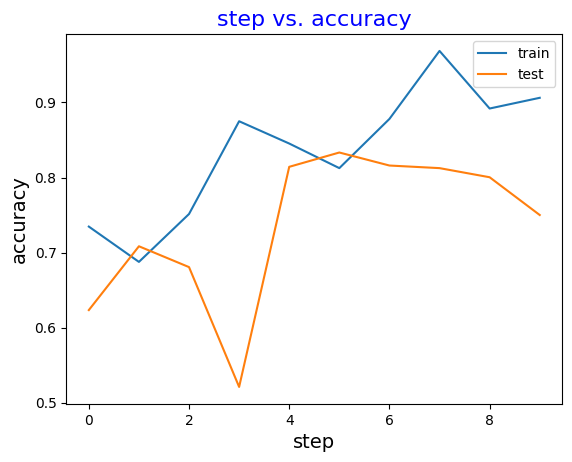

In [ ]:
# evaluating model
import matplotlib.pyplot as plt

plt.plot(model_history.history['accuracy'], label='train')
plt.plot(model_history.history['val_accuracy'], label='test')
plt.title('step vs. accuracy', size=16, c='b')
plt.xlabel('step', size=14)
plt.ylabel('accuracy', size=14)
plt.legend(loc='best')
plt.show()

## according to the graph of accuracy vs. step, this model overfits (considering the accuracy of train is higher than that of test).
# we can control several parameters to avoid this overfitting.
# CNN model's accuracy is quite high (0.85 ~ 0.92)

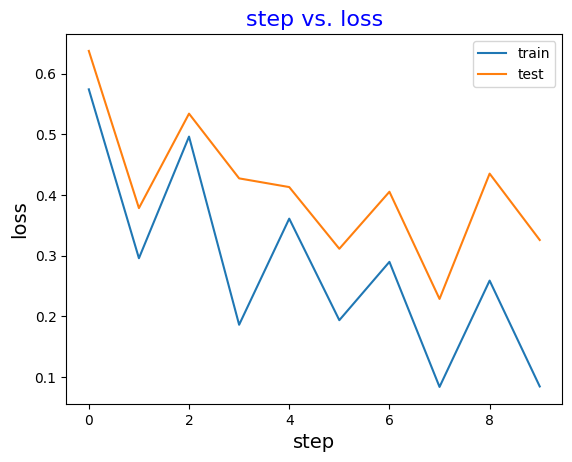

In [ ]:
plt.plot(model_history.history['loss'], label='train')
plt.plot(model_history.history['val_loss'], label='test')
plt.title('step vs. loss', size=16, c='b')
plt.xlabel('step', size=14)
plt.ylabel('loss', size=14)
plt.legend(loc='best')
plt.show()

In [ ]:
# making predictions on a single image(Normal)
from tensorflow.keras.preprocessing.image import load_img, img_to_array

file_path='/Users/anik_singhal/Desktop/Projects/makathon/dataset/chest_xray/val/NORMAL/NORMAL2-IM-1436-0001.jpeg'

# load the image
img=load_img(file_path, target_size=(64,64))
# convert to array
img=img_to_array(img)
img

array([[[  0.,   0.,   0.],
        [ 56.,  56.,  56.],
        [ 23.,  23.,  23.],
        ...,
        [103., 103., 103.],
        [ 26.,  26.,  26.],
        [ 26.,  26.,  26.]],

       [[ 77.,  77.,  77.],
        [120., 120., 120.],
        [ 47.,  47.,  47.],
        ...,
        [ 20.,  20.,  20.],
        [ 22.,  22.,  22.],
        [ 16.,  16.,  16.]],

       [[ 65.,  65.,  65.],
        [ 78.,  78.,  78.],
        [110., 110., 110.],
        ...,
        [ 19.,  19.,  19.],
        [ 20.,  20.,  20.],
        [ 16.,  16.,  16.]],

       ...,

       [[ 12.,  12.,  12.],
        [ 19.,  19.,  19.],
        [ 14.,  14.,  14.],
        ...,
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       [[  0.,   0.,   0.],
        [  8.,   8.,   8.],
        [  9.,   9.,   9.],
        ...,
        [  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  0.,   0.,   0.]],

       [[  0.,   0.,   0.],
        [  0.,   0.,   0.],
        [  1.,  

In [ ]:
img.shape

(64, 64, 3)

In [ ]:
# reshape into (1, 64, 64, 3)
img=img.reshape(1,64,64,3)

In [ ]:
img_pred=model.predict(img)
img_pred

# since 0 indicates normal case (not pneumonia), the prediction is right

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


array([[1.]], dtype=float32)

In [ ]:
# making predictions on a single image (pneumonia)
from tensorflow.keras.preprocessing.image import load_img, img_to_array

file_path2='/Users/anik_singhal/Desktop/Projects/makathon/dataset/WhatsApp Image 2024-02-24 at 16.28.48.jpeg'

# load the image
img2=load_img(file_path2, target_size=(64,64))
# convert to array
img2=img_to_array(img2)
img2

array([[[  8.,   8.,   8.],
        [  8.,   8.,   8.],
        [  8.,   8.,   8.],
        ...,
        [  3.,   3.,   3.],
        [  4.,   4.,   4.],
        [  4.,   4.,   4.]],

       [[  7.,   7.,   7.],
        [  8.,   8.,   8.],
        [  7.,   7.,   7.],
        ...,
        [ 18.,  18.,  18.],
        [  0.,   0.,   0.],
        [  3.,   3.,   3.]],

       [[  8.,   8.,   8.],
        [  7.,   7.,   7.],
        [  6.,   6.,   6.],
        ...,
        [ 41.,  41.,  41.],
        [ 29.,  29.,  29.],
        [ 16.,  16.,  16.]],

       ...,

       [[ 56.,  56.,  56.],
        [ 93.,  93.,  93.],
        [118., 118., 118.],
        ...,
        [164., 164., 164.],
        [118., 118., 118.],
        [ 92.,  92.,  92.]],

       [[ 48.,  48.,  48.],
        [ 89.,  89.,  89.],
        [113., 113., 113.],
        ...,
        [163., 163., 163.],
        [110., 110., 110.],
        [ 87.,  87.,  87.]],

       [[ 46.,  46.,  46.],
        [ 82.,  82.,  82.],
        [110., 1

In [ ]:
# reshape into (1, 64, 64, 3)
img2=img2.reshape(1,64,64,3)


In [ ]:
img_pred2=model.predict(img2)
img_pred2

# since 1 indicates pneumonia case, the prediction is right

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


array([[1.]], dtype=float32)

In [ ]:
import pickle
pickle.dump(model,open('model.pkl','wb'))

AttributeError: Can't pickle local object 'Layer._initializer_tracker.<locals>.<lambda>'

# training VGG6 model

In [ ]:
# vgg16 model accepts an image size of 224*224*3
# vgg16 model cosists of 5 blocks and 16 layers in total,
# each block is separated by a pooling layer
# kernel size for all Convolutional layers remain 3x3.

# from tensorflow.keras.applications.vgg16 import VGG16

# vgg16_model=VGG16()
# vgg16_model.summary()

Exception: URL fetch failure on https://storage.googleapis.com/tensorflow/keras-applications/vgg16/vgg16_weights_tf_dim_ordering_tf_kernels.h5: None -- [Errno -3] Temporary failure in name resolution

In [ ]:
# output from the last layer is a 1000-dimensional vector
# this is because the ImageNet dataset on which the VGG16 model is trained with 1000 classes.
# Since we are going to change the top and final layer (input_layer=(64,64) and final layer= 1 class),
# use the pretrained weight parameter, 'imagenet'
# input_shape=[64,64,3]
# myvgg16_model=VGG16(input_shape=input_shape, weights='imagenet', include_top=False)

Exception: URL fetch failure on https://storage.googleapis.com/tensorflow/keras-applications/vgg16/vgg16_weights_tf_dim_ordering_tf_kernels_notop.h5: None -- [Errno -3] Temporary failure in name resolution

In [ ]:
# only train the final dense layer of our VGG16, and all other layers will not be trained.
# order not to train default VGG16 layers
# for layer in myvgg16_model.layers:
#     layer.trainable=False

In [ ]:
# model creation for image classificatoin
# flat1=Flatten()(myvgg16_model.output)
# dense1=Dense(128, activation='relu')(flat1)
# output_layer=Dense(1, activation='sigmoid')(dense1)

# model2=Model(myvgg16_model.input, output_layer)

In [ ]:
# # compiling model
# model2.compile(optimizer=adam,
#              loss='binary_crossentropy',
#              metrics=['accuracy'])

In [ ]:
# from tensorflow.keras.utils import plot_model
# plot_model(model2, show_shapes=True, show_layer_names=True)

In [ ]:
# training the VGG16 model
# model_history2=model2.fit(train_data, steps_per_epoch=step_per_epoch, epochs=20,
#                        validation_data=test_data, validation_steps=validation_step)

In [ ]:
# model2.evaluate(test_data)

In [ ]:
# model_history2.history

In [ ]:
# plt.plot(pd.DataFrame(model_history2.history))
# plt.title('step vs. accuracy, loss', size=16, c='b')
# plt.xlabel('step', size=14)
# plt.ylabel('accuracy, loss', size=14)
# plt.legend(['loss','accuracy','val_loss','val_accuracy'], loc='best')
# plt.show()


## VGG16 model also slightly overfits (considering the accuracy of train is higher than that of test).
# we can control several parameters to avoid this overfitting.
# VGG16 model's accuracy is also as high as CNN model (0.85 ~ 0.92) 

In [ ]:
# predicting on a single image

# img_pred3=model2.predict(img)
# img_pred3

# this prediction is wrong, since the img was the image of normal case, but the prediction says it is not normal

In [ ]:
# img_pred4=model2.predict(img2)
# img_pred4

# this prediction is right, because the img2 was the image of pneumonia case